In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from folktables import ACSDataSource, ACSEmployment, generate_categories, ACSIncome, ACSHealthInsurance
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.formula.api import ols
from scipy.stats import linregress
import math
import sklearn
from sklearn.metrics import mean_squared_error
import statistics
import numpy as np

In [2]:
from folk_data_preProcessor import preProcessor
from folktables import ACSDataSource, ACSEmployment

# import the data
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, _ = ACSEmployment.df_to_pandas(acs_data)

# obtain the data sets
data = preProcessor(acs_data, features, "WAGP")

In [3]:
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)
nat_group = acs_data["NATIVITY"]
sex_group = acs_data["SEX"]
cont_labels = acs_data["WAGP"]
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(features, label, group, test_size=0.2, random_state=np.random.seed())

#X_train, X_test, y_train, y_test, group_train, group_test, sex_train, sex_test = train_test_split(features, label, group, sex_group, test_size=0.2, random_state=np.random.seed())

In [4]:
ACSIncome_categories = {
    "COW": {
        1.0: (
            "Employee of a private for-profit company or"
            "business, or of an individual, for wages,"
            "salary, or commissions"
        ),
        2.0: (
            "Employee of a private not-for-profit, tax-exempt,"
            "or charitable organization"
        ), 
        3.0: "Local government employee (city, county, etc.)",
        4.0: "State government employee",
        5.0: "Federal government employee", 
        6.0: (
            "Self-employed in own not incorporated business,"
            "professional practice, or farm"
        ),
        7.0: (
            "Self-employed in own incorporated business,"
            "professional practice or farm"
        ),
        8.0: "Working without pay in family business or farm",
        9.0: "Unemployed and last worked 5 years ago or earlier or never worked",
    },
    "SCHL": {
        1.0: "No schooling completed",
        2.0: "Nursery school, preschool",
        3.0: "Kindergarten",
        4.0: "Grade 1",
        5.0: "Grade 2",
        6.0: "Grade 3",
        7.0: "Grade 4",
        8.0: "Grade 5",
        9.0: "Grade 6",
        10.0: "Grade 7",
        11.0: "Grade 8",
        12.0: "Grade 9",
        13.0: "Grade 10",
        14.0: "Grade 11",
        15.0: "12th grade - no diploma",
        16.0: "Regular high school diploma",
        17.0: "GED or alternative credential",
        18.0: "Some college, but less than 1 year",
        19.0: "1 or more years of college credit, no degree",
        20.0: "Associate's degree",
        21.0: "Bachelor's degree",
        22.0: "Master's degree",
        23.0: "Professional degree beyond a bachelor's degree",
        24.0: "Doctorate degree",
    },
    "MAR": {
        1.0: "Married",
        2.0: "Widowed",
        3.0: "Divorced",
        4.0: "Separated",
        5.0: "Never married or under 15 years old",
    },
    "SEX": {1.0: "Male", 2.0: "Female"},
    "RAC1P": {
        1.0: "White alone",
        2.0: "Black or African American alone",
        3.0: "American Indian alone",
        4.0: "Alaska Native alone",
        5.0: (
            "American Indian and Alaska Native tribes specified;"
            "or American Indian or Alaska Native,"
            "not specified and no other"
        ),
        6.0: "Asian alone",
        7.0: "Native Hawaiian and Other Pacific Islander alone",
        8.0: "Some Other Race alone",
        9.0: "Two or More Races",
    },
}

## Plotting

In [5]:
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
ca_data = data_source.get_data(states=["CA"], download=True)

ca_features1, ca_labels1, _ = ACSIncome.df_to_pandas(ca_data, categories=ACSIncome_categories, dummies=False)
ca_features1

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,30,Self-employed in own not incorporated business...,Grade 11,Married,9610.0,6,16,40.0,Male,Some Other Race alone
1,21,State government employee,Regular high school diploma,Never married or under 15 years old,1970.0,6,17,20.0,Male,White alone
2,65,"Employee of a private not-for-profit, tax-exem...",Master's degree,Never married or under 15 years old,2040.0,6,17,8.0,Male,White alone
3,33,Employee of a private for-profit company orbus...,Grade 11,Divorced,9610.0,36,16,40.0,Male,White alone
4,18,"Employee of a private not-for-profit, tax-exem...","1 or more years of college credit, no degree",Never married or under 15 years old,1021.0,6,17,18.0,Female,White alone
...,...,...,...,...,...,...,...,...,...,...
195660,38,Employee of a private for-profit company orbus...,Master's degree,Married,1021.0,210,0,40.0,Male,Asian alone
195661,39,Employee of a private for-profit company orbus...,Master's degree,Married,1021.0,210,1,40.0,Female,Asian alone
195662,61,Employee of a private for-profit company orbus...,"1 or more years of college credit, no degree",Married,5240.0,17,0,45.0,Male,White alone
195663,69,"Self-employed in own incorporated business,pro...",Doctorate degree,Married,2040.0,207,0,45.0,Male,Asian alone


In [6]:
asian=ca_features1[ca_features1['RAC1P']=='Asian alone']
black=ca_features1[ca_features1['RAC1P']=='Black or African American alone']
white=ca_features1[ca_features1['RAC1P']=='White alone']
hisp=ca_features1[ca_features1['RAC1P']=='Some Other Race alone']
plottable=pd.concat([asian, black, white, hisp])
#plottable=plottable.drop(["Alaska Native alone","American Indian and Alaska Native tribes specified;or American Indian or Alaska Native,not specified and no other", "Some Other Race alone", "White alone", "Two or More Races", "Black or African American alone", "American Indian alone", "Native Hawaiian and Other Pacific Islander alone", "Asian alone"], axis=1)
plottable['AGEP'] = plottable['AGEP'].astype(int) #changing strings with numbers to integers
plottable['OCCP'] = plottable['OCCP'].astype(int)
plottable['POBP'] = plottable['POBP'].astype(int)
plottable['RELP'] = plottable['RELP'].astype(int)
plottable['WKHP'] = plottable['WKHP'].astype(int)
plottable


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
27,23,"Employee of a private not-for-profit, tax-exem...",Bachelor's degree,Never married or under 15 years old,2545,207,17,20,Female,Asian alone
33,18,Employee of a private for-profit company orbus...,Regular high school diploma,Never married or under 15 years old,9610,6,17,8,Female,Asian alone
49,18,Employee of a private for-profit company orbus...,"Some college, but less than 1 year",Never married or under 15 years old,725,6,17,12,Female,Asian alone
53,25,State government employee,Bachelor's degree,Never married or under 15 years old,3870,6,17,40,Male,Asian alone
80,20,"Employee of a private not-for-profit, tax-exem...",GED or alternative credential,Never married or under 15 years old,725,6,17,18,Female,Asian alone
...,...,...,...,...,...,...,...,...,...,...
195602,24,Employee of a private for-profit company orbus...,Bachelor's degree,Never married or under 15 years old,2300,6,2,40,Female,Some Other Race alone
195628,46,Employee of a private for-profit company orbus...,GED or alternative credential,Married,8740,303,0,40,Female,Some Other Race alone
195629,50,Employee of a private for-profit company orbus...,12th grade - no diploma,Married,7340,303,1,50,Male,Some Other Race alone
195642,42,Employee of a private for-profit company orbus...,Grade 9,Married,6260,303,0,40,Male,Some Other Race alone


In [7]:
X_plot=plottable.sample(n=1000)

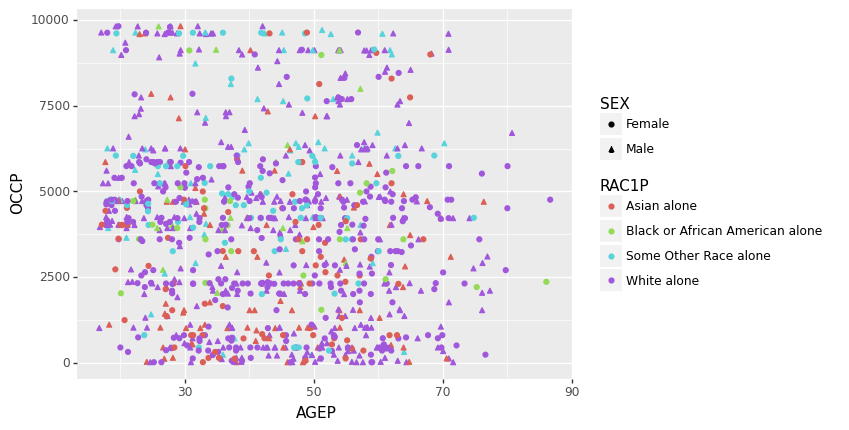

<ggplot: (167492593652)>

In [8]:
import  plotnine
from plotnine import ggplot, aes, geom_line, geom_jitter

(
    ggplot(X_plot)  # What data to use
    + aes(x="AGEP", y="OCCP", color="RAC1P")  # What variable to use
    + geom_jitter(aes(shape='SEX'))  # Geometric object to use for drawing
)

#### Linear Regression

In [9]:
#linear
import scipy
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_predn=linreg.predict(X_test)
from sklearn import metrics
print("RMSE: %f" % (metrics.mean_squared_error(y_test,y_predn, squared=False)))

RMSE: 0.403196


In [10]:
#linear
import scipy
linreg=LinearRegression()
linreg.fit(data[0],data[2])
y_predn=linreg.predict(data[1])
linear_MAE=metrics.mean_absolute_error(data[3],y_predn)
print(linear_MAE)
print("RMSE: %f" % (metrics.mean_squared_error(data[3],y_predn, squared=False)))

0.5401860854730923
RMSE: 0.933750


#### Using XGBoost

In [11]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
print(xgboost.__version__)


1.6.2


References:
1. https://machinelearningmastery.com/xgboost-for-regression/
2. https://www.youtube.com/watch?v=sxfpzUF6FLA


In [12]:
#non-linear
xg_reg = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.6,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.356296


In [13]:
#non-linear
xg_reg = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.6,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(data[0],data[2])

preds = xg_reg.predict(data[1])

rmse = np.sqrt(mean_squared_error(data[3], preds))
print("RMSE: %f" % (rmse))

RMSE: 0.837724


### Note: currently the part from here to AIF360 is not in use

In [14]:
"""#not currently in use
features, label, group = ACSEmployment.df_to_numpy(ca_features)
#nat_group = ca_features["NATIVITY"]

dff = ca_data[ca_data['WAGP'].notna()]
t = pd.DataFrame(np.hstack((features, np.array(cont_labels).reshape(-1, 1)))).dropna()
cont_features, cont_labels, cont_group = t.iloc[:, 0:16], t.iloc[:,16], t[15]
#caa_data=ca_data.drop(['WAGP'],axis=1)"""


'#not currently in use\nfeatures, label, group = ACSEmployment.df_to_numpy(ca_features)\n#nat_group = ca_features["NATIVITY"]\n\ndff = ca_data[ca_data[\'WAGP\'].notna()]\nt = pd.DataFrame(np.hstack((features, np.array(cont_labels).reshape(-1, 1)))).dropna()\ncont_features, cont_labels, cont_group = t.iloc[:, 0:16], t.iloc[:,16], t[15]\n#caa_data=ca_data.drop([\'WAGP\'],axis=1)'

In [15]:
ACSEmployment.df_to_numpy(ca_data)

(array([[30., 14.,  1., ...,  2.,  1.,  8.],
        [18., 14.,  5., ...,  2.,  2.,  1.],
        [69., 17.,  1., ...,  2.,  1.,  9.],
        ...,
        [43., 16.,  1., ...,  2.,  2.,  8.],
        [23., 16.,  5., ...,  2.,  1.,  8.],
        [18., 14.,  5., ...,  2.,  1.,  8.]]),
 array([False, False, False, ..., False, False, False]),
 array([8, 1, 9, ..., 8, 8, 8], dtype=int64))

In [16]:
ca_use=pd.DataFrame(ca_data)

ca_use=ca_use.drop(['RT', 'SERIALNO', 'NAICSP', 'SOCP','WAGP'], axis=1)
ca_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378817 entries, 0 to 378816
Columns: 281 entries, DIVISION to PWGTP80
dtypes: float64(84), int64(197)
memory usage: 812.1 MB


In [19]:
"""ca_use=pd.DataFrame(dff)

ca_use=ca_use.drop(['RT', 'SERIALNO', 'NAICSP', 'SOCP','WAGP','CITWP','COW'], axis=1)
ca_use.head()"""

"ca_use=pd.DataFrame(dff)\n\nca_use=ca_use.drop(['RT', 'SERIALNO', 'NAICSP', 'SOCP','WAGP','CITWP','COW'], axis=1)\nca_use.head()"

In [20]:
"""X,y=cont_features,cont_labels
X"""

'X,y=cont_features,cont_labels\nX'

In [ ]:
data_dmatrix = xgboost.DMatrix(data=X,label=y)
data_dmatrix

# AIF360

Issue 1: requires to convert the dataframe to a BinaryLabelDataSet

In [21]:
un=acs_data.dropna(how='any',axis=1)
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378817 entries, 0 to 378816
Columns: 199 entries, RT to PWGTP80
dtypes: int64(197), object(2)
memory usage: 575.1+ MB


In [22]:
target_sex=un['SEX'].value_counts()
target_sex

2    192140
1    186677
Name: SEX, dtype: int64

In [23]:
target_race=un['RAC1P'].value_counts()
target_race

1    232609
6     59650
8     44243
9     19147
2     18238
3      2817
7      1208
5       877
4        28
Name: RAC1P, dtype: int64

In [24]:
target_status=un['MAR'].value_counts()
target_status

5    171168
1    155186
3     29635
2     17158
4      5670
Name: MAR, dtype: int64

Dropping some of those columns from the dataset doesn't change anything, it just helps process 3 times faster. I will standardize the PWGTP ones .

In [25]:
un=un.drop(['RT','SERIALNO'], axis=1)

In [26]:
un=un.drop(['PWGTP50','PWGTP51','PWGTP52','PWGTP53','PWGTP54','PWGTP55','PWGTP56','PWGTP57','PWGTP58','PWGTP59','PWGTP60','PWGTP61','PWGTP62','PWGTP63','PWGTP64','PWGTP65','PWGTP66','PWGTP67','PWGTP68','PWGTP69','PWGTP70','PWGTP71','PWGTP72','PWGTP73','PWGTP74','PWGTP75','PWGTP76','PWGTP77','PWGTP78','PWGTP79','PWGTP80' ], axis=1)

In [27]:
un=un.drop(['PWGTP20','PWGTP21','PWGTP22','PWGTP23','PWGTP24','PWGTP25','PWGTP26','PWGTP27','PWGTP28','PWGTP29','PWGTP30','PWGTP31','PWGTP32','PWGTP33','PWGTP34','PWGTP35','PWGTP36','PWGTP37','PWGTP38','PWGTP39','PWGTP40','PWGTP41','PWGTP42','PWGTP43','PWGTP44','PWGTP45','PWGTP46','PWGTP47','PWGTP48','PWGTP49'], axis=1)

In [28]:
un=un.drop(['PWGTP10','PWGTP11','PWGTP12','PWGTP13','PWGTP14','PWGTP15','PWGTP16','PWGTP17','PWGTP18','PWGTP19'], axis=1)

In [29]:
un=un.drop(['PWGTP1','PWGTP2','PWGTP3','PWGTP4','PWGTP5','PWGTP6','PWGTP7','PWGTP8','PWGTP9'], axis=1)

In [30]:
un=un.drop(['DIVISION', 'REGION','ST','ADJINC'],axis=1)

In [31]:
un['FRACP'].value_counts()

0    367906
1     10911
Name: FRACP, dtype: int64

In [33]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import StructuredDataset

In [34]:
sd = aif360.datasets.StructuredDataset(df=un, label_names=['FWAGP'], protected_attribute_names=['SEX'])

In [35]:
sd

               instance weights features                                      \
                                                                               
                                 SPORDER    PUMA  PWGTP  AGEP  CIT DEAR DEYE   
instance names                                                                 
0                           1.0      1.0  3701.0   32.0  30.0  1.0  2.0  2.0   
1                           1.0      1.0  7306.0   45.0  18.0  1.0  2.0  2.0   
2                           1.0      1.0  3755.0  109.0  69.0  1.0  2.0  2.0   
3                           1.0      1.0  7319.0   34.0  25.0  1.0  1.0  2.0   
4                           1.0      1.0  6511.0   46.0  31.0  1.0  2.0  2.0   
...                         ...      ...     ...    ...   ...  ...  ...  ...   
378812                      1.0      2.0  1308.0   94.0  61.0  4.0  2.0  2.0   
378813                      1.0      1.0  7108.0  172.0  40.0  4.0  2.0  2.0   
378814                      1.0      2.0

In [36]:
#for Structured Dataset
di1 = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train1 = di1.fit_transform(sd)
transformed = dataset_transf_train1.convert_to_dataframe()[0]

In [37]:
#linear
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)
X_trainn, X_testn, y_trainn, y_testn, group_trainn, group_testn = train_test_split(features, label, group, test_size=0.2, random_state=0)

###### Your favorite learning algorithm here #####
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_trainn, y_trainn)

yhat = model.predict(X_testn)

white_tpr = np.mean(yhat[(y_testn == 1) & (group_testn == 1)])
black_tpr = np.mean(yhat[(y_testn == 1) & (group_testn == 2)])

# Equality of opportunity violation: 0.0455
white_tpr - black_tpr


0.04549392964278809

In [38]:
x_trans = transformed.drop(['FWAGP'], axis = 1)
y = transformed['FWAGP']
scaler = StandardScaler()
data_std = scaler.fit_transform(x_trans)
x_trans_train,x_trans_test,y_trans_train,y_trans_test = train_test_split(x_trans, y, test_size=0.2, random_state = np.random.seed())

In [39]:
y_trans_pred=model.fit(x_trans_train,y_trans_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
y_transpred=y_trans_pred.predict(x_trans_test)

In [41]:
print("RMSE: %f" % (metrics.mean_squared_error(y_trans_test,y_transpred, squared=False)))

RMSE: 0.047369


In [42]:
from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test,y_transpred))
print("Precision:",metrics.precision_score(y_test,y_transpred))
print("Recall:", metrics.recall_score(y_test,y_transpred))

Accuracy: 0.5307137954701441
Precision: 0.45598232494901425
Recall: 0.15545062139691185
